In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('paper.mplstyle')

# Set default dtype for arrays to single precision (float32)
np_float = np.float32

# Exercise 1

In [2]:
### Differentiation methods

def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def extrapolated_difference(f, x, h):
    f1 = central_difference(f, x, h)
    f2 = central_difference(f, x, 2*h)
    return (4 * f1 - f2) / 3

def rel_error(approx, exact):
    return np.abs((approx - exact) / exact)

In [69]:
### Define array of step sizes and compute errors for x=0.1 and x=10
hs = np.logspace(-20, 0, num=2**8, base=2, dtype=np_float)

errors_01_f = rel_error(forward_difference(np.cos, np_float(0.1), hs), np.ones_like(hs)*-np.sin(np_float(0.1)))
errors_01_c = rel_error(central_difference(np.cos, np_float(0.1), hs), np.ones_like(hs)*-np.sin(np_float(0.1)))
errors_01_e = rel_error(extrapolated_difference(np.cos, np_float(0.1), hs), np.ones_like(hs)*-np.sin(np_float(0.1)))

errors_10_f = rel_error(forward_difference(np.cos, np_float(10), hs), np.ones_like(hs)*-np.sin(np_float(10)))
errors_10_c = rel_error(central_difference(np.cos, np_float(10), hs), np.ones_like(hs)*-np.sin(np_float(10)))
errors_10_e = rel_error(extrapolated_difference(np.cos, np_float(10), hs), np.ones_like(hs)*-np.sin(np_float(10)))

C:\Users\leouh\AppData\Local\Temp\ipykernel_17660\297236182.py:16: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(np.log10(hs), np.log10(errors_01_c), label='Central')


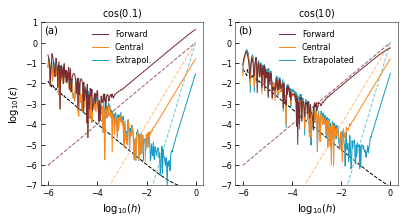

In [291]:
fig = plt.figure(figsize=(6.4,3))

# First subplot for x=0.1
ax1 = fig.add_subplot(1, 2, 1)

# Roundoff error estimate line
ax1.plot(np.log10(hs), np.log10(10**-7 * np.abs(forward_difference(np.cos, np_float(0.1), hs)) / hs), 'k--')

# Truncation error estimate lines
ax1.plot(np.log10(hs), np.log10(hs), '--', color='C8')
ax1.plot(np.log10(hs), np.log10(hs**2), '--', color='C7')
ax1.plot(np.log10(hs), np.log10(hs**4), '--', color='C6')

# Actual errors
ax1.plot(np.log10(hs), np.log10(errors_01_e), label='Extrapol.')
ax1.plot(np.log10(hs), np.log10(errors_01_c), label='Central')
ax1.plot(np.log10(hs), np.log10(errors_01_f), label='Forward')

# Formatting
ax1.tick_params(axis='both', which='minor', length=0)
ax1.set_ylim(-7, 1)
ax1.set_xlabel(r'$\log_{10}(h)$')
ax1.set_ylabel(r'$\log_{10}(\epsilon)$')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1])
ax1.text(0.02, 0.98, '(a)', transform=ax1.transAxes, va='top', ha='left', fontsize=10)
ax1.set_title(r'$\cos(0.1)$')

# Second subplot for x=10
ax2 = fig.add_subplot(1, 2, 2)

# Roundoff error estimate line
ax2.plot(np.log10(hs), np.log10(10**-7 * np.abs(forward_difference(np.cos, np_float(10), hs)) / hs), 'k--')

# Truncation error estimate lines
ax2.plot(np.log10(hs), np.log10(hs), '--', color='C8')
ax2.plot(np.log10(hs), np.log10(hs**2), '--', color='C7')
ax2.plot(np.log10(hs), np.log10(hs**4), '--', color='C6')

# Actual errors
ax2.plot(np.log10(hs), np.log10(errors_10_e), label='Extrapolated')
ax2.plot(np.log10(hs), np.log10(errors_10_c), label='Central')
ax2.plot(np.log10(hs), np.log10(errors_10_f), label='Forward')

# Formatting
ax2.tick_params(axis='both', which='minor', length=0)
ax2.set_ylim(-7, 1)
ax2.set_xlabel(r'$\log_{10}(h)$')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[::-1], labels[::-1])
ax2.text(0.02, 0.98, '(b)', transform=ax2.transAxes, va='top', ha='left', fontsize=10)
ax2.set_title(r'$\cos(10)$')


plt.savefig('HW1_figures/HW1_errors.pdf', bbox_inches='tight')

In [3]:
### Define array of step sizes and compute errors for x=0.1 and x=10
hs = np.logspace(-20, 0, num=2**8, base=2, dtype=np_float)

errors_01_f2 = rel_error(forward_difference(np.exp, np_float(0.1), hs), np.ones_like(hs)*np.exp(np_float(0.1)))
errors_01_c2 = rel_error(central_difference(np.exp, np_float(0.1), hs), np.ones_like(hs)*np.exp(np_float(0.1)))
errors_01_e2 = rel_error(extrapolated_difference(np.exp, np_float(0.1), hs), np.ones_like(hs)*np.exp(np_float(0.1)))

errors_10_f2 = rel_error(forward_difference(np.exp, np_float(10), hs), np.ones_like(hs)*np.exp(np_float(10)))
errors_10_c2 = rel_error(central_difference(np.exp, np_float(10), hs), np.ones_like(hs)*np.exp(np_float(10)))
errors_10_e2 = rel_error(extrapolated_difference(np.exp, np_float(10), hs), np.ones_like(hs)*np.exp(np_float(10)))

In [16]:
giacomo = 10**-7 * np.abs(np.exp(0.1)) / hs
giacomo2 = 10**-7 * np.abs(np.exp(10)) / hs

C:\Users\leouh\AppData\Local\Temp\ipykernel_17432\258135640.py:43: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(np.log10(hs), np.log10(errors_10_c2), label='Central')


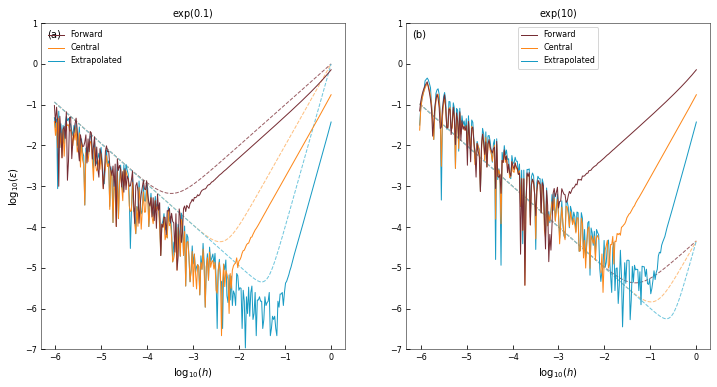

In [18]:
# fig = plt.figure(figsize=(6.4,3))
fig = plt.figure(figsize=(12,6))

# First subplot for x=0.1
ax1 = fig.add_subplot(1, 2, 1)

# Roundoff error estimate line
# ax1.plot(np.log10(hs), np.log10(10**-7 * np.abs(forward_difference(np.exp, np_float(0.1), hs)) / hs), 'k--')

# Truncation error estimate lines
ax1.plot(np.log10(hs), np.log10(hs + giacomo), '--', color='C8')
ax1.plot(np.log10(hs), np.log10(hs**2 + giacomo), '--', color='C7')
ax1.plot(np.log10(hs), np.log10(hs**4 + giacomo), '--', color='C6')

# Actual errors
ax1.plot(np.log10(hs), np.log10(errors_01_e2), label='Extrapolated')
ax1.plot(np.log10(hs), np.log10(errors_01_c2), label='Central')
ax1.plot(np.log10(hs), np.log10(errors_01_f2), label='Forward')

# Formatting
ax1.tick_params(axis='both', which='minor', length=0)
ax1.set_ylim(-7, 1)
ax1.set_xlabel(r'$\log_{10}(h)$')
ax1.set_ylabel(r'$\log_{10}(\epsilon)$')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1])
ax1.text(0.02, 0.98, '(a)', transform=ax1.transAxes, va='top', ha='left', fontsize=10)
ax1.set_title(r'$\exp(0.1)$')

# Second subplot for x=10
ax2 = fig.add_subplot(1, 2, 2)

# Roundoff error estimate line
# ax2.plot(np.log10(hs), np.log10(10**-7 * np.abs(forward_difference(np.exp, np_float(10), hs)) / hs), 'k--')

# Truncation error estimate lines
ax2.plot(np.log10(hs), np.log10((hs + giacomo2)/np.exp(10)), '--', color='C8')
ax2.plot(np.log10(hs), np.log10((hs**2 + giacomo2)/np.exp(10)), '--', color='C7')
ax2.plot(np.log10(hs), np.log10((hs**4 + giacomo2)/np.exp(10)), '--', color='C6')

# Actual errors
ax2.plot(np.log10(hs), np.log10(errors_10_e2), label='Extrapolated')
ax2.plot(np.log10(hs), np.log10(errors_10_c2), label='Central')
ax2.plot(np.log10(hs), np.log10(errors_10_f2), label='Forward')

# Formatting
ax2.tick_params(axis='both', which='minor', length=0)
ax2.set_ylim(-7, 1)
ax2.set_xlabel(r'$\log_{10}(h)$')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[::-1], labels[::-1], loc='upper center', frameon=True)
ax2.text(0.02, 0.98, '(b)', transform=ax2.transAxes, va='top', ha='left', fontsize=10)
ax2.set_title(r'$\exp(10)$')

plt.savefig('HW1_figures/HW1_errors_b.pdf', bbox_inches='tight')

# Exercise 2

In [273]:
### Integration methods. Make sure all values are float32.

def midpoint_rule(f, a, b, N):
    a = np_float(a)
    b = np_float(b)
    N = np.int32(N)
    h = (b - a) / N
    midpoints = a + h * (np.arange(0, N, dtype=np_float) + np_float(0.5))
    return h * np.sum(f(midpoints), dtype=np_float)

def trapezoidal_rule(f, a, b, N):
    a = np_float(a)
    b = np_float(b)
    N = np.int32(N)
    h = (b - a) / N
    x = np.linspace(a, b, np.int32(N) + 1, dtype=np_float)
    y = f(x)
    N = np.int32(N)
    return (h / np_float(2)) * (y[0] + np_float(2) * np.sum(y[1:N], dtype=np_float) + y[N])

def simpsons_rule(f, a, b, N):
    a = np_float(a)
    b = np_float(b)
    N = np.int32(N)
    h = (b - a) / N
    x = np.linspace(a, b, np.int32(N) + 1, dtype=np_float)
    y = f(x)
    N = np.int32(N)
    return (h / np_float(3)) * (y[0] + np_float(4) * np.sum(y[1:N:2]) + np_float(2) * np.sum(y[2:N-1:2]) + y[N])

C:\Users\leouh\AppData\Local\Temp\ipykernel_17660\2619372858.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(Ns[:22]), np.log10(1/Ns[:22]**2), '--', label=r'$N^{-2}$', color='C6')
C:\Users\leouh\AppData\Local\Temp\ipykernel_17660\2619372858.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.log10(Ns[:22]), np.log10(1/Ns[:22]**2), '--', label=r'$N^{-2}$', color='C6')
C:\Users\leouh\AppData\Local\Temp\ipykernel_17660\2619372858.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(Ns[:13]), np.log10(1/Ns[:13]**4), '--', label=r'$N^{-4}$', color='C8')
C:\Users\leouh\AppData\Local\Temp\ipykernel_17660\2619372858.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.log10(Ns[:13]), np.log10(1/Ns[:13]**4), '--', label=r'$N^{-4}$', color='C8')
C:\Users\leouh\AppData\Local\Temp\ipykernel_17660\2619372858.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(Ns), [np.log10(rel_

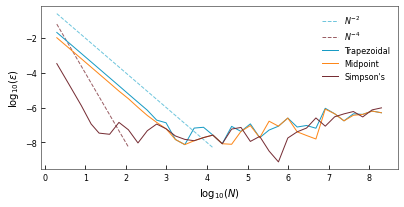

In [288]:
### Define array of even N values on logspace
Ns = np.logspace(-1, 8, num=40, base=10, dtype=np.int32)
Ns = Ns*2

plt.plot(np.log10(Ns[:22]), np.log10(1/Ns[:22]**2), '--', label=r'$N^{-2}$', color='C6')
plt.plot(np.log10(Ns[:13]), np.log10(1/Ns[:13]**4), '--', label=r'$N^{-4}$', color='C8')

plt.plot(np.log10(Ns), [np.log10(rel_error(trapezoidal_rule(np.exp, -1, 0, N), (np.exp(1) - 1)/np.exp(1))) for N in Ns], '-', label='Trapezoidal')
plt.plot(np.log10(Ns), [np.log10(rel_error(midpoint_rule(np.exp, -1, 0, N), (np.exp(1) - 1)/np.exp(1))) for N in Ns], '-', label='Midpoint')
plt.plot(np.log10(Ns), [np.log10(rel_error(simpsons_rule(np.exp, -1, 0, N), (np.exp(1) - 1)/np.exp(1))) for N in Ns], '-', label="Simpson's")

plt.xlabel(r'$\log_{10}(N)$')
plt.ylabel(r'$\log_{10}(\epsilon)$')
plt.legend()
plt.savefig('HW1_figures/HW1_integration.pdf', bbox_inches='tight')

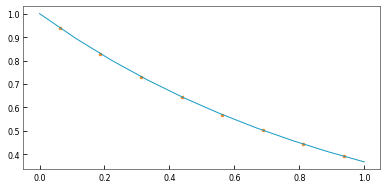

In [ ]:
plt.plot(np.linspace(0, 1, 10), np.exp(-np.linspace(0, 1, 10)))
plt.scatter(np.linspace(0+1/16, 1-1/16, 8), np.exp(-np.linspace(0+1/16, 1 - 1/16, 8)), color='C1')

# Ex. 3

In [ ]:
# Load columns 1 and 2 from the data file
wavenumber, powerspectrum = np.loadtxt('lcdm_z0.matter_pk', usecols=(0, 1), dtype=np.float32, unpack=True)
         
# Create an interpolation function for powerspectrum vs wavenumber
powerspectrum_interp = CubicSpline(wavenumber, powerspectrum)

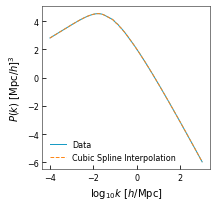

In [ ]:
# Test figure of data and interpolation
plt.figure(figsize=(3,3))
plt.plot(np.log10(wavenumber), np.log10(powerspectrum))
plt.plot(np.log10(wavenumber), np.log10(powerspectrum_interp(wavenumber)), '--')

plt.xlabel(r'$\log_{10}{k}$ [$h$/Mpc]')
plt.ylabel(r'$P(k)$ [Mpc/$h$]$^3$')

plt.legend(['Data', 'Cubic Spline Interpolation'])
plt.savefig('HW1_figures/HW1_powerspectrum.pdf', bbox_inches='tight')

In [ ]:
# Calculate the correlation function on range k = 0 to 35 h/Mpc
corr = []
rs = np.arange(40, 120)
for r in rs:
    xi = 1/(2*np.pi**2) * simpsons_rule(lambda k: k**2 * powerspectrum_interp(k) * np.sinc(k*r / np.pi), 0, 35, 3500)
    corr.append(xi)
corr = np.array(corr)

In [ ]:
# Calculate the correlation function on range k = 35 to 45 h/Mpc to test convergence
corr2 = []
for r in rs:
    xi = 1/(2*np.pi**2) * simpsons_rule(lambda k: k**2 * powerspectrum_interp(k) * np.sinc(k*r / np.pi), 35, 45, 2500)
    corr2.append(xi)
corr2 = np.array(corr2)

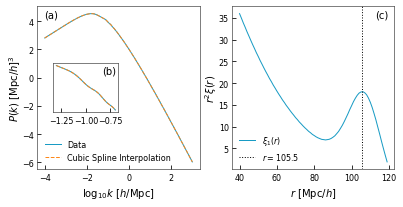

In [271]:
### Make plot for figure 1 in ex. 3
fig = plt.figure(figsize=(6.4,3))

# First subplot for PS
ax1 = fig.add_subplot(1, 2, 1)

ax1.plot(np.log10(wavenumber), np.log10(powerspectrum), label='Data')
ax1.plot(np.log10(wavenumber), np.log10(powerspectrum_interp(wavenumber)), '--', label='Cubic Spline Interpolation')

# Formatting
ax1.set_xlabel(r'$\log_{10}{k}$ [$h$/Mpc]')
ax1.set_ylabel(r'$P(k)$ [Mpc/$h$]$^3$', labelpad=-1)
ax1.legend()
ax1.text(0.04, 0.98, '(a)', transform=ax1.transAxes, va='top', ha='left', fontsize=10)

# Add inset to zoom in on oscillatory features
axins = inset_axes(ax1, width="40%", height="30%", loc='center left', borderpad=2)
mask = (wavenumber >= 0.05) & (wavenumber <= 0.2)
axins.plot(np.log10(wavenumber[mask]), np.log10(powerspectrum[mask]), color='C0')
axins.plot(np.log10(wavenumber[mask]), np.log10(powerspectrum_interp(wavenumber[mask])), '--', color='C1')
axins.text(0.75, 0.95, '(b)', transform=axins.transAxes, va='top', ha='left', fontsize=10)
axins.set_yticks([])

# Second subplot for xi(r)
ax2 = fig.add_subplot(1, 2, 2)

ax2.plot(rs, rs**2*(corr), label=r'$\xi_1(r)$')
ax2.axvline(x=105.5, color='k', linestyle=':', linewidth=1, label=r'$r=105.5$')

# Formatting
ax2.set_xlabel(r'$r$ [Mpc/$h$]')
ax2.set_ylabel(r'$r^2 \xi(r)$', labelpad=-1)
ax2.text(0.88, 0.98, '(c)', transform=ax2.transAxes, va='top', ha='left', fontsize=10)
ax2.legend()

plt.savefig('HW1_figures/HW1_powerspectrum.pdf', bbox_inches='tight')

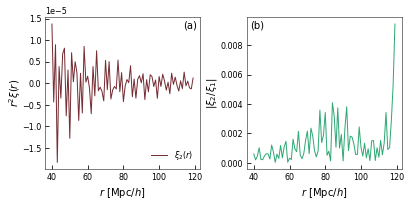

In [243]:
fig = plt.figure(figsize=(6.4,2.8))

# First subplot for PS
ax1 = fig.add_subplot(1, 2, 1)

ax1.plot(rs, corr2, color='C2')
ax1.set_xlabel(r'$r$ [Mpc/$h$]')
ax1.set_ylabel(r'$r^2 \xi(r)$', labelpad=-1)
ax1.legend([r'$\xi_2(r)$'], loc='lower right')
ax1.text(0.89, 0.98, '(a)', transform=ax1.transAxes, va='top', ha='left', fontsize=10)

ax2 = fig.add_subplot(1, 2, 2)

ax2.plot(rs, np.abs(corr2/corr), color='C3')

ax2.set_xlabel(r'$r$ [Mpc/$h$]')
ax2.set_ylabel(r'$|\xi_2/\xi_1|$', labelpad=1.5)

ax2.text(0.02, 0.98, '(b)', transform=ax2.transAxes, va='top', ha='left', fontsize=10)

fig.subplots_adjust(wspace=0.3)

plt.savefig('HW1_figures/HW1_correlation.pdf', bbox_inches='tight')

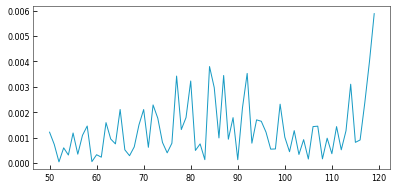

In [145]:
plt.plot(rs, np.abs((corr3)/(corr + corr2)))